In [3]:
import mne
from mne_connectivity import spectral_connectivity_epochs
from mne.datasets import sample
from mne_connectivity.viz import plot_sensors_connectivity
from MEG_pareidolia_utils import*
from PARAMS import *
import numpy as np

In [245]:
epochs_name, epochs_path = get_pareidolia_bids(FOLDERPATH, '04', 'pareidolia', '4', stage = 'epo_long', cond=None)
epochs = mne.read_epochs(epochs_path)

Reading D:\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_long.fif ...


<ipython-input-245-a2f5a7b718f6>:2: RuntimeWarning: This filename (D:\PsychoPy_MEG\BIDS_data\sub-04\ses-recording\meg\sub-04_ses-recording_task-pareidolia_run-4_epo_long.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epochs_path)


    Found the data of interest:
        t =   -1500.00 ...    8000.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Adding metadata with 7 columns
52 matching events found
No baseline correction applied
0 projection items activated


In [226]:
a = con_par.get_data(output='dense')[:, :, :]
b = con_nopar.get_data(output='dense')[:, :, :]

In [244]:
c = [a, b]

np.save('test', c)

In [38]:
a = np.load('connectivity_1sec_par_bloc_6subj_10_wpli.npy')
a = np.load('node_degree_1sec_par_WPLI_blocs0.6.npy', allow_pickle=True)



In [68]:
np.array(a[1]).shape

(6, 7, 270)

In [78]:
arr = []
for subj in range(len(a)):
    arr.append(np.expand_dims((np.array(a[subj])), axis=0))
#
#arr = np.concatenate((arr))
a[subj][bloc][band][159]

0

In [79]:
bands_names = ['delta', 'theta', 'alpha', 'lobeta', 'hibeta', 'gamma1', 'gamma2']
df = pd.DataFrame()
df_list = []
for subj in range(len(a)):
    for bloc in range(len(a[subj])):
        for band in range(len(a[subj][bloc])):
            for elec in range(len(a[subj][bloc][band])):
                df[bands_names[band]] = a[subj][bloc][band][elec]
                df['electrode'] = elec
                df['participant'] = int(subj)
                df['bloc'] = int(bloc)
                df['pareidolia'] = 1
            
                df_list.append(df)

            
df_final = pd.concat(df_list)
df_final

,delta,electrode,participant,bloc,pareidolia,theta,alpha,lobeta,hibeta,gamma1,gamma2


In [237]:
epochs['earlyVSlate== 1']
epochs.metadata

,FD,FD_class,n_obj,n_obj_class,parei,contrast,earlyVSlate,spont_par
2,1.500,1,1.0,1,1,0.0,2,1
5,1.875,2,0.0,0,0,0.0,0,0
8,1.650,1,0.0,0,0,0.0,0,0
11,1.950,2,0.0,0,0,0.0,0,0
14,1.575,1,0.0,0,0,0.0,0,0
17,1.275,0,0.0,0,0,1.0,0,0
21,1.425,1,1.0,1,1,1.0,2,1
25,1.200,0,1.0,1,1,1.0,2,1
29,1.425,1,1.0,1,1,0.0,1,1
32,1.050,0,0.0,0,0,1.0,0,0


In [274]:
con_mat = con_par.get_data(output='dense')[:, :, 0]


def node_degree(con_mat, threshold=0.6):
    thresh_node_degree = []
    for i in range(len(con_mat)):
        n_nodes = 0
        for j in range(len(con_mat[0])):
            if con_mat[i, j] > threshold:
                n_nodes += 1
        thresh_node_degree.append(n_nodes)
    return thresh_node_degree

<ipython-input-7-abc7808a4161>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


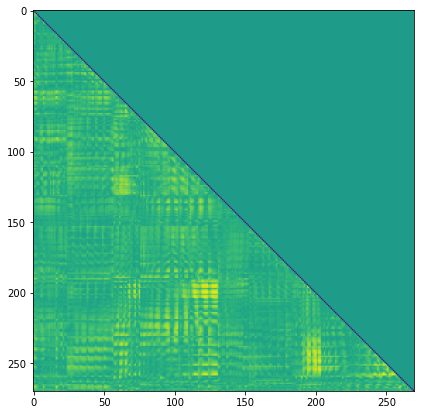

In [7]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(adj_wei)
fig.show()

In [6]:
adj_wei = a - np.eye(a.shape[0])
adj_bin = brainconn.utils.binarize(brainconn.utils.threshold_proportional(adj_wei, 0.2))

NameError: name 'brainconn' is not defined

In [4]:
test = np.load('connectivity_RT_nopar_WPLI.npy')
a = test[0, :, :, 0]
b = node_degree(a)
b

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 11,
 13,
 9,
 0,
 11,
 16,
 14,
 0,
 12,
 14,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 7,
 5,
 8,
 5,
 1,
 1,
 5,
 

In [228]:
c = sum([a, b])/len([a, b])

In [255]:
con_par = spectral_connectivity_epochs(
    epochs[0:5], method='pli', mode='multitaper', sfreq=sfreq, fmin=fmin, fmax=fmax,
    faverage=True, tmin=tmin, mt_adaptive=False, n_jobs=1, block_size=128)

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 36315 connections
    using t=0.000s..8.000s for estimation (9601 points)
    computing connectivity for the bands:
     band 1: 4.1Hz..8.0Hz (32 points)
     band 2: 8.1Hz..12.0Hz (32 points)
     band 3: 12.1Hz..20.0Hz (64 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    assembling connectivity matrix
[Connectivity computation done]


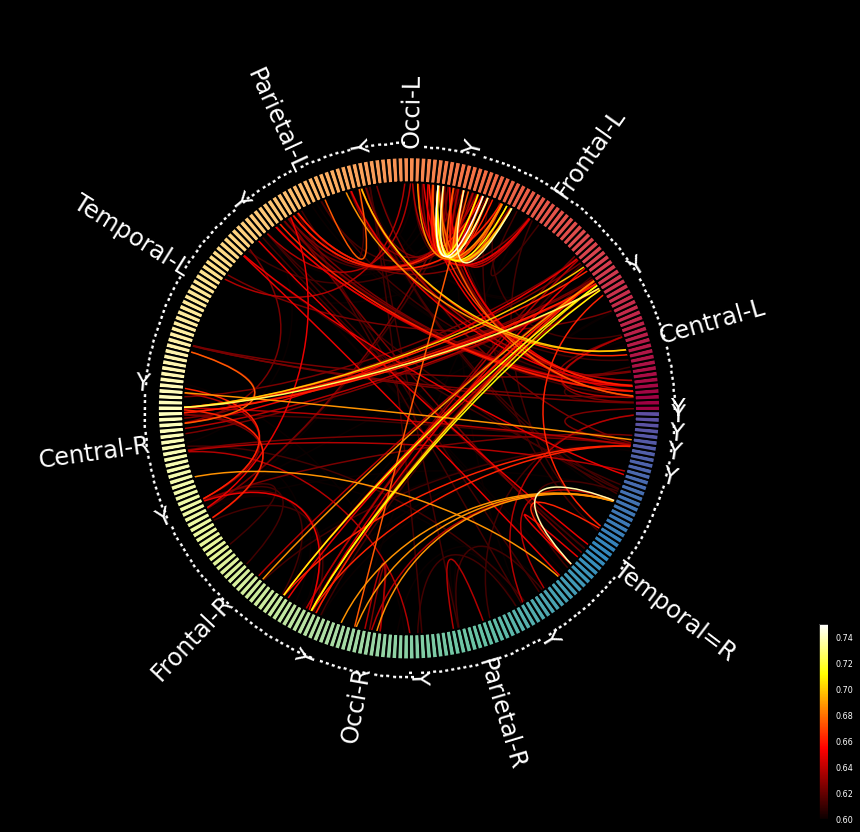

In [258]:
fig = plot_connectivity_circle(con_par.get_data(output='dense')[:, :, 0], node_names=names, n_lines=250,
                        fontsize_names=24, show=False)
fig[0].set_size_inches(18, 18)
#fig[0]

In [194]:
epochs = epochs.crop(1, 2.5)
fmin, fmax = (4., 8., 12), (8., 12., 20)
sfreq = 1200  # the sampling frequency
tmin = 0.0  # exclude the baseline period
#epochs.load_data().pick_types(meg='grad')  # just keep MEG and no EOG now

#CHOICES OF METHODS: ['coh', 'cohy', 'imcoh', 'plv', 'ciplv', 'ppc', 'pli', 'wpli', 'wpli2_debiased']
con_par = spectral_connectivity_epochs(
    epochs['RT_par'], method='pli', mode='multitaper', sfreq=sfreq, fmin=fmin, fmax=fmax,
    faverage=True, tmin=tmin, mt_adaptive=False, n_jobs=1, block_size=128)

con_nopar = spectral_connectivity_epochs(
    epochs['RT_nopar'], method='pli', mode='multitaper', sfreq=sfreq, fmin=fmin, fmax=fmax,
    faverage=True, tmin=tmin, mt_adaptive=False, n_jobs=1, block_size=128)

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 36315 connections
    using t=1.000s..2.500s for estimation (1801 points)
    computing connectivity for the bands:
     band 1: 4.7Hz..8.0Hz (6 points)
     band 2: 8.7Hz..12.0Hz (6 points)
     band 3: 12.7Hz..20.0Hz (12 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLI
    computing connectivity for epoch 1


<ipython-input-194-7a6602b5cf7f>:8: RuntimeWarning: start time tmin=0.00 s outside of the time scope of the data [1.00 s, 2.50 s]
  con_par = spectral_connectivity_epochs(


    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivity for epoch 15
    computing connectivity for epoch 16
    computing connectivity for epoch 17
    computing connectivity for epoch 18
    computing connectivity for epoch 19
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 36315 connections
    using t=1.000s..2.500s for estimation (1801 points)
    computing connectivity for the bands:

<ipython-input-194-7a6602b5cf7f>:12: RuntimeWarning: start time tmin=0.00 s outside of the time scope of the data [1.00 s, 2.50 s]
  con_nopar = spectral_connectivity_epochs(


    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivity for epoch 15
    computing connectivity for epoch 16
    computing connectivity for epoch 17
    computing connectivity for epoch 18
    computing connectivity for epoch 19
    computing connectivity for epoch 20
    computing connectivity for epoch 21
    computing connectivity for epoch 22
    computing connectivity for epoch 23
    computing connectivity for epoch 24
    computing connectivity for epoch 25
    computing connectivity for epoch 26
    comp

In [210]:
len(con_par.get_data(output='dense')[0, 0])

3

In [54]:
from mne.datasets import sample
from mne.minimum_norm import apply_inverse_epochs, read_inverse_operator
from mne_connectivity import SpectralConnectivity
from mne_connectivity.viz import plot_connectivity_circle
from mne.viz import circular_layout



In [150]:
MEG_atlas = {'CL': list(range(0, 24)), 'FL': list(range(24, 57)), 'OL': list(range(57, 76)), 
             'PL': list(range(76, 97)), 'TL': list(range(97, 131)),
             'CR': list(range(131, 153)), 'FR': list(range(153, 186)), 'OR': list(range(186, 204)), 
             'PR': list(range(204, 226)), 'TR': list(range(226, 259)), 'CZ': list(range(259, 263)),
             'Fz': list(range(263, 266)), 'OZ': list(range(266, 269)), 'PZ': list(range(269, 270))
            }
MEG_regions = list(MEG_atlas.keys())
region_lists = []
for r in MEG_regions:
    region_lists.append([MEG_atlas[r]][0])
    
    
dict_names = {'Central-L':12, 'Frontal-L':41, 'Occi-L':67, 'Parietal-L':86, 'Temporal-L':111, 'Central-R':141,
              'Frontal-R':170, 'Occi-R':195, 'Parietal-R':215, 'Temporal=R':242}
edges = [0, 24, 57, 76, 97, 131, 153, 186, 204, 226, 259, 263, 266, 269, 270]
names = []
for i in range(270):
    if i in dict_names.values():
        names.append([name for name, idx in dict_names.items() if idx == i][0])
    if i in edges:
        names.append('Y')

    if i not in dict_names.values() and i not in edges:
        names.append('.')

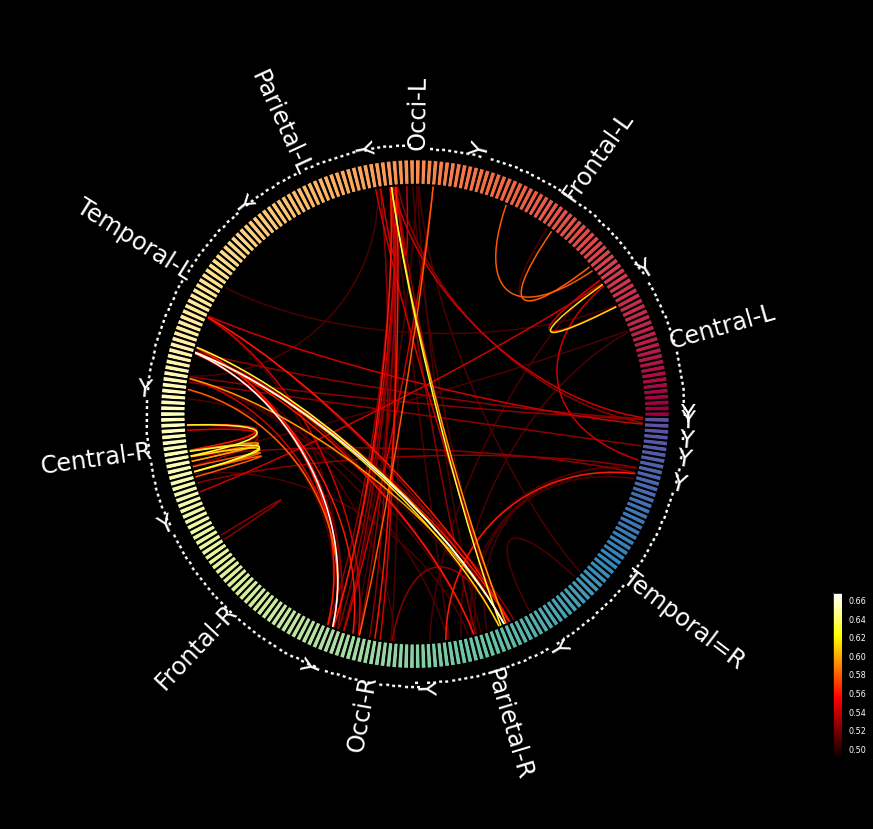

In [197]:

fig = plot_connectivity_circle(con_par.get_data(output='dense')[:, :, 0], node_names=names, n_lines=100,
                        fontsize_names=24, show=False)
fig[0].set_size_inches(30, 15)
#fig[0]

In [215]:
epochs_standard = mne.concatenate_epochs([epochs,
                                          epochs])

Adding metadata with 8 columns
104 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped


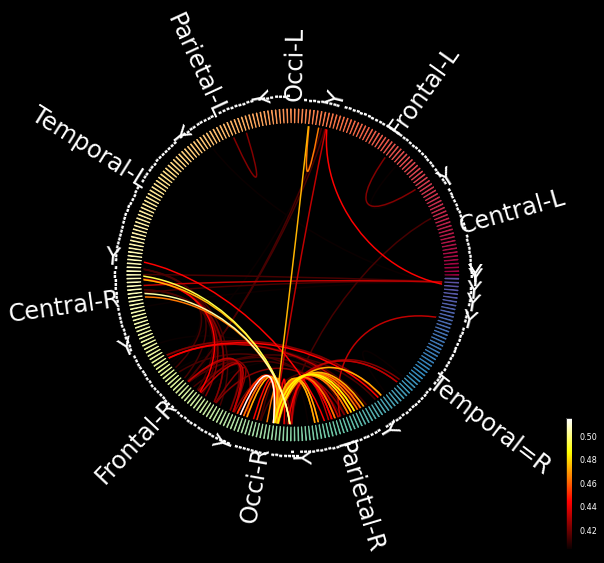

In [204]:
fig = plot_connectivity_circle(con_nopar.get_data(output='dense')[:, :, 0], node_names=names, n_lines=100,
                        fontsize_names=24, show=False)
fig[0].set_size_inches(18, 18)

In [205]:
fig[0].savefig('test.png')